In [1]:
import datetime
import os
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from rich.console import Console
from rich.theme import Theme

project_dir = os.path.abspath('../../')
if project_dir not in sys.path:
    sys.path.append(project_dir)
    
sns.set_palette('bright')
%load_ext autoreload
%autoreload 2
theme = Theme({"repr.number": "#ff79ff", "repr.path": '#f92672'})
console = Console(theme=theme, width=240, log_path=False,
                  log_time=True, log_time_format='[%X]')
#%matplotlib notebook
plt.style.use('default')
sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_palette('bright')
%matplotlib inline

GREEN = '#87ff00'
PINK = '#F92672'
BLUE = '#007dff'
YELLOW = '#FFFF00'
RED = '#FF4050'


Bad key "text.kerning_factor" on line 4 in
/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
rc_context = {
    'font.family': 'lmodern',
    'font.size': 12.,  # 9.6000000000000000001
    'figure.figsize': (4, 3),
    'axes.labelsize': 12.,
    'legend.fontsize': 8.,
    'legend.labelspacing': 0.2, # 0.5
    'legend.handletextpad': 0.3,  # 0.8
    'text.usetex': False,
    'text.latex.preamble': (            # LaTeX preamble
        #r'\usepackage{lmodern}'
        r'\usepackage{amsmath}'
        r'\usepackage{amssymb}'
        r'\usepackage{microtype}'
        r'\usepackage{bm}'
        r'\usepackage{bbm}'
    )
}

In [3]:
from rich import print

In [4]:
from utils.data_containers import DataContainer
from config import PLOTS_DIR
import utils.file_io as io

def get_dataset(data_dir, therm_frac=0.2, num_chains=4, label=None):
    container = DataContainer(0)
    data = container.load_data(data_dir)
    for key, val in data.items():
        container.data[key] = np.array(val).tolist()
        
    dataset = container.get_dataset(therm_frac=therm_frac)
    return dataset

def remake_ridgeplot(dataset, label_str, num_chains=4):
        
    tstamp = io.get_timestamp('%Y-%m-%d')
    outdir = os.path.join(PLOTS_DIR, 'ridgeplots', tstamp)
    io.check_else_make_dir(outdir)
    
    fig, ax = make_ridgeplots1(dataset, num_chains=num_chains, out_dir=outdir, label_str=label_str)
    
    return fig, ax

tf.__version__: 2.5.0


In [22]:
#run_dir = os.path.abspath('/lus/grand/projects/DLHMC/training/annealing_schedules/bi1bf7/l2hmc-qcd/logs/GaugeModel_logs/2021_02/L16_b1024_lf11_actswish_bi1_bf7_dp01_sepNets_NCProj/inference/L16_b1024__lf11_eps005-2021-02-26-0545/')
#run_dir = os.path.abspath('/Users/saforem2/grand/projects/DLHMC/training/annealing_schedules/bi1bf7/l2hmc-qcd/logs/GaugeModel_logs/2021_02/L16_b1024_lf11_actswish_bi1_bf7_dp01_sepNets_NCProj/inference/L16_b1024__lf11_eps005-2021-02-26-0545/')
#run_dir = os.path.abspath('/lus/grand/projects/DLHMC/training/annealing_schedules/bi4bf5/l2hmc-qcd/logs/GaugeModel_logs/2021_02/L16_b2048_lf13_actswish_bi4_bf5_dp01_sepNets_NCProj/inference/L16_b2048__lf13_eps005-2021-02-16-1958/')
#run_dir = os.path.abspath('/lus/grand/projects/DLHMC/l2hmc-qcd/logs/GaugeModel_logs/2021_03/L16_b2048_lf9_actswish_bi4_bf5_dp01_sepNets_NCProj_nw111111/inference/L16_b2048__lf9_eps005-2021-03-24-0405/')
#run_dir = os.path.abspath('/lus/grand/projects/DLHMC/l2hmc-qcd/logs/GaugeModel_logs/2021_02/L16_b2048_lf9_actswish_bi4_bf4_dp01_sepNets_NCProj_nw111111/inference/L16_b2048__lf9_eps005-2021-02-28-0816/')
run_dir = os.path.abspath('/lus/grand/projects/DLHMC/l2hmc-qcd/logs/GaugeModel_logs/2021_03/L16_b2048_lf9_actswish_bi4_bf5_dp01_sepNets_NCProj_nw111111/inference/L16_b2048__lf9_eps005-2021-03-24-0405/')
print(os.path.isdir(run_dir))
print(os.listdir(run_dir))

In [23]:
import pandas as pd
from utils.plotting_utils import truncate_colormap

from utils.data_utils import therm_arr

import matplotlib as mpl
import utils.file_io as io
from config import PLOTS_DIR, MARKERS

pfplotdir = os.path.join(PLOTS_DIR, 'plaqsf_vs_lf')
betas = np.arange(2, 8)

plt.style.use('default')
sns.set_context('paper')
sns.set_palette('bright')
sns.set_style('whitegrid')
plt.rc('text', usetex=True)


def make_ridgeplots1(
    dataset,
    num_chains=-1,
    num_pts=-1,
    therm_frac=0.1,
    aspect=15,
    height=0.15,
    out_dir=None,
    drop_zeros=False,
    label_str=None,
    cmap='rocket_r',
    usetex=True,
    ylabels=True,
    xticks=None,
    hspace=-0.25,
    #labelsize='medium',
):
    sns.set_style(style='white', rc={'axes.facecolor': (0, 0, 0, 0)})
    rc_context = {
        'text.usetex': usetex,
        #'axes.labelsize': 'xsmall',
        #'axes.labelsize': labelsize,
    }#, axes.labelsize}
    #$'axes.labelsize': 12.,
    with mpl.rc_context(rc_context):
        data = {}
        for key, val in dataset.data_vars.items():
            if 'leapfrog' in val.coords.dims:
                lf_data = {
                    key: [],
                    'lf': [],
                }
                for lf in val.leapfrog.values:
                    x = val[{'leapfrog': lf}].values
                    if num_chains is not None:
                        console.log(f'x.shape: {x.shape}')
                        x = therm_arr(x, therm_frac=therm_frac, ret_steps=False)
                        x = x[:num_chains, :num_pts]
                        #console.log(f'x.shape: {x.shape}')

                    x = x.flatten()
                    lf_arr = np.array(len(x) * [f'{lf}'])
                    lf_data[key].extend(x)
                    lf_data['lf'].extend(lf_arr)

                lfdf = pd.DataFrame(lf_data)
                data[key] = {
                    'lfdf': lfdf,
                    'val': val,
                }
                
                pal = sns.color_palette(cmap, n_colors=len(val.leapfrog.values))
                #g = sns.facetgrid(lfdf, row='lf', hue='lf', aspect=1, height=3, palette=pal)
                g = sns.FacetGrid(lfdf, row='lf', hue='lf',  aspect=aspect, height=height, palette=pal)
                #g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)
                    
                # Draw the densities in a few steps
                #g.map(sns.kdeplot, "x",
                #      bw_adjust=.5, clip_on=False,
                #      fill=True, alpha=1, linewidth=1.5)
                _ = g.map(sns.kdeplot, key, cut=1, shade=True, alpha=0.7, linewidth=1.5, clip_on=False)
                
                #g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
                g.map(sns.kdeplot, key, clip_on=False, lw=1.5)
                
                #g.map(plt.axhline, y=0, lw=2, clip_on=False)
                _ = g.map(plt.axhline, y=0, lw=1.5, alpha=1., clip_on=False, ls='-')
                def get_label(x, color, label):
                    ax = plt.gca()
                    #ax.text(0, 0.01, label, color=color, ha='left', va='bottom', fontweight='bold',
                    #        transform=ax.transAxes)#, fontsize='small')
                    ax.text(0, 0.075, label, fontweight="bold", color=color,
                            ha="left", va="center", transform=ax.transAxes, fontsize='small')


                if ylabels:
                    _ = g.map(get_label, key)
                    
                if xticks is not None:
                    plt.xticks(xticks)
                    #plt.xlim(xlim)
                    
                #if xticks is not None:
                #    _ = g.set(xticks=xticks)#, fontsize='small')
                    
                #_ = g.set(xlabel=label_str, fontsize='small')
                
                #if xticks is not None:
                #    _ = ax.set_xticks(xticks)
                    #_ = ax.set_xticklabels([str(i) for i in xticks])
                fig = plt.gcf()
                ax = plt.gca()
                
                _ = ax.set_xlabel(label_str, fontsize='small')
                
                #_ = g.fig.subplots_adjust(hspace=-0.725)
                _ = g.fig.subplots_adjust(hspace=hspace)
                _ = g.set_titles('')
                _ = g.set(yticks=[])
                _ = g.despine(bottom=True, left=True)
                
                #if xticks is not None:
                #    xticklabels = [str(i) for i in xticks]
                #else:
                #    xticklabels = [str(i) for i in ax.get_xticks()]
                    
                #_ = ax.set_xticklabels(xticklabels, fontsize='small')
                #_ = fig.align_labels(axs=ax)
                
                #if xticks is None:
                #xticks = ax.get_xticklabels()
                
                #_ = ax.set_xticklabels(xticks, fontsize='small')
                
                #_ = plt.tight_layout()
                #_ = fig.align_labels(axs=ax)
                #_ = plt.tight_layout()
                _ = fig.execute_constrained_layout()
                #_ = plt.Axes.autoscale_view(tight=True)
                if out_dir is not None:
                    timestr = io.get_timestamp('%H%M')
                    #plt.tight_layout()
                    io.check_else_make_dir(out_dir)
                    out_file = os.path.join(out_dir, f'{key}_{timestr}.pdf')
                    io.log(f'Saving figure to: {out_file}')
                    plt.savefig(out_file, dpi=400, bbox_inches='tight')

    return data, (fig, ax)

In [24]:
import xarray as xr
from utils.data_utils import therm_arr

def make_dataset(arr, name, therm_frac=0.2, num_pts=None, num_chains=None):
    arr, steps = therm_arr(arr, therm_frac=therm_frac)
    if num_pts is not None:
        arr = arr[:num_pts]
        
    data_vars = {}
    if len(arr.shape) == 1:
        data_vars[name] = xr.DataArray(arr, dims=['draw'], coords=[steps])
        
    elif len(arr.shape) == 3:
        if num_chains is not None:
            arr = arr[:, :, :num_chains]
        
        arr = arr.T
        chains, leapfrogs, _ = arr.shape
        
        dims = ['chain', 'leapfrog', 'draw']
        coords = [np.arange(chains), np.arange(leapfrogs), steps]
        data_vars[name] = xr.DataArray(arr, dims=dims, coords=coords)
    else:
        if num_chains is not None:
            arr = arr[:, :num_chains]
            
        chains = np.arange(arr.shape[1])
        data_vars[name] = xr.DataArray(arr.T, dims=['chain', 'draw'], coords=[chains, steps])
        
    return xr.Dataset(data_vars)

## Load `sinQf` data from `run_dir` and create `xr.Dataset` for plotting

In [25]:
from config import PLOTS_DIR
#ridgeplots_dir = os.path.join(PLOTS_DIR, 'ridgeplots', '2021-01-20')

sfile = os.path.join(run_dir, 'run_data', 'sinQf.z')
sinQf = io.loadz(sfile)
sinQf_dataset = make_dataset(sinQf, name='sinQf', therm_frac=0.5)

sdataset_file = os.path.join(run_dir, 'run_data', 'sinQf.nc')
if not os.path.isfile(sdataset_file):
    console.log(f'Saving sinQf dataset to: {sdataset_file}')
    sinQf_dataset.to_netcdf(sdataset_file)

console.log(sinQf_dataset)

In [26]:
pfile = os.path.join(run_dir, 'run_data', 'plaqsf.z')

plaqsf = io.loadz(pfile)
plaqsf_dataset = make_dataset(plaqsf, name='plaqsf', therm_frac=0.5)

pdataset_file = os.path.join(run_dir, 'run_data', 'plaqsf.nc')
if not os.path.isfile(pdataset_file):
    console.log(f'Saving plaqsf dataset to: {pdataset_file}')
    plaqsf_dataset.to_netcdf(pdataset_file)

console.log(plaqsf_dataset)

In [27]:
hfile = os.path.join(run_dir ,'run_data', 'Hwf.z')
hwf = io.loadz(hfile)
hwf_dataset = make_dataset(hwf, name='hwf', therm_frac=0.5)

hdataset_file = os.path.join(run_dir, 'run_data', 'Hwf.nc')
if not os.path.isfile(hdataset_file):
    console.log(f'Saving hwf_dataset to : {hdataset_file}')
    hwf_dataset.to_netcdf(hdataset_file)

In [28]:
import utils.file_io as io
from config import PLOTS_DIR

daystr = io.get_timestamp('%Y-%m-%d')
timestr = io.get_timestamp('%H%M')

ridgeplots_dir = os.path.join(PLOTS_DIR, 'ridgeplots')
outdir = os.path.join(ridgeplots_dir, daystr)

/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
<ipython-input-23-aa700ae7141a>:137: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.su

/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
<ipython-input-23-aa700ae7141a>:137: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.su

/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
<ipython-input-23-aa700ae7141a>:137: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.su

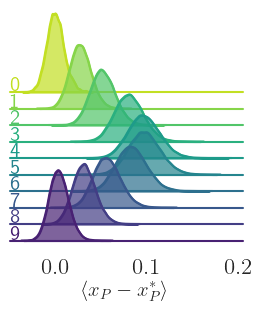

RuntimeError: latex was not able to process the following string:
b'$\\\\mathcal{Q}_{\\\\mathbb{R}}$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/foremans/.cache/matplotlib/tex.cache/a6fe0a71563a7421859f424e6dbebba5.te
x
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/gpfs/mira-home/foremans/.linuxbrew/Cellar/texlive/20200715_1/texlive/texmf-di
st/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class

(/gpfs/mira-home/foremans/.linuxbrew/Cellar/texlive/20200715_1/texlive/texmf-di
st/tex/latex/base/size10.clo))
(/gpfs/mira-home/foremans/.linuxbrew/Cellar/texlive/20200715_1/texlive/texmf-di
st/tex/latex/type1cm/type1cm.sty)
(/gpfs/mira-home/foremans/.linuxbrew/Cellar/texlive/20200715_1/texlive/texmf-di
st/tex/latex/base/textcomp.sty)
(/gpfs/mira-home/foremans/.linuxbrew/Cellar/texlive/20200715_1/texlive/texmf-di
st/tex/latex/base/inputenc.sty)
(/gpfs/mira-home/foremans/.linuxbrew/Cellar/texlive/20200715_1/texlive/texmf-di
st/tex/latex/geometry/geometry.sty
(/gpfs/mira-home/foremans/.linuxbrew/Cellar/texlive/20200715_1/texlive/texmf-di
st/tex/latex/graphics/keyval.sty)
(/gpfs/mira-home/foremans/.linuxbrew/Cellar/texlive/20200715_1/texlive/texmf-di
st/tex/generic/iftex/ifvtex.sty
(/gpfs/mira-home/foremans/.linuxbrew/Cellar/texlive/20200715_1/texlive/texmf-di
st/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
(/gpfs/mira-home/foremans/.linuxbrew/Cellar/texlive/20200715_1/texlive/texmf-di
st/tex/latex/l3backend/l3backend-dvips.def)
(./a6fe0a71563a7421859f424e6dbebba5.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.14 ...18.742500}{\sffamily $\mathcal{Q}_{\mathbb
                                                  {R}}$}
No pages of output.
Transcript written on a6fe0a71563a7421859f424e6dbebba5.log.




<Figure size 300x300 with 10 Axes>

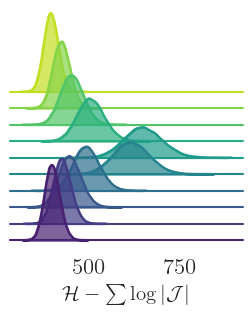

In [29]:
sinQf_label = r"""$\mathcal{Q}_{\mathbb{R}}$"""
sinQf_fout = os.path.join(outdir, f'sinQf_{timestr}.pdf')

hwf_label = r"""$\mathcal{H} - \sum\log|\mathcal{J}|$"""
hwf_fout = os.path.join(outdir, f'Hwf_{timestr}_1.pdf')

plaqsf_label = r"""$\langle x_{P} - x_{P}^{*}\rangle$"""
plaqsf_fout = os.path.join(outdir, f'plaqsf_{timestr}.pdf')

plt.style.use('default')
sns.set_context('paper')
sns.set_palette('bright')
sns.set_style('whitegrid')
plt.rc('text', usetex=True)
#plt.rcParams.update(rc_context)

sns.set_palette('bright')
sns.set_context('talk')#, font_scale=0.85)#)#, font_scale=1.25)
cmap = plt.get_cmap('viridis_r')
#color = '#0182CA'
color = '#1AC938'
sns.set_style('whitegrid')#
with mpl.rc_context({
    #'font.family': 'lmodern',
    #'font.size': 12.,  # 9.6000000000000000001
    #'figure.figsize': (4, 3),
    #'axes.labelsize': 12.,
    #'legend.fontsize': 8.,
    #'legend.labelspacing': 0.2, # 0.5
    #'legend.handletextpad': 0.3,  # 0.8
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        #r'\usepackage{lmodern}'
        r'\usepackage{amsmath}'
        r'\usepackage{amssymb}'
        r'\usepackage{microtype}'
        r'\usepackage{bm}'
        r'\usepackage{bbm}'
    )
}):
    plaqsf_data_, (fig, ax) = make_ridgeplots1(plaqsf_dataset, label_str=plaqsf_label, cmap='viridis_r',
                                               num_chains=64, num_pts=1000, therm_frac=0.5,
                                               aspect=10, height=0.3, hspace=-0.8, out_dir=outdir,#, labelsize='small',
                                               usetex=True, ylabels=True)#, xticks=((-4, 4)))
    
    sinQf_data_, (fig, ax) = make_ridgeplots1(sinQf_dataset, label_str=sinQf_label, cmap='viridis_r',
                                              num_chains=64, num_pts=1000, therm_frac=0.5,
                                              aspect=10, height=0.3, hspace=-0.8, out_dir=outdir,#, labelsize='small',
                                              usetex=True, ylabels=False)#, xticks=((-4, 4)))
    
    hwf_data_, (fig, ax) = make_ridgeplots1(hwf_dataset, label_str=hwf_label, cmap='viridis_r',
                                            num_chains=64, num_pts=1000, therm_frac=0.5,
                                            aspect=10, height=0.3, hspace=-0.8, out_dir=outdir,#, labelsize='small',
                                            usetex=True, ylabels=False)#, xticks=((-4, 4)))
    


NameError: name 'hwf_dataset' is not defined

<IPython.core.display.Javascript object>


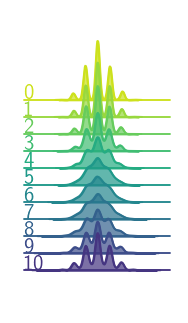

/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
<ipython-input-79-e5020c6f38b0>:109: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  _ = plt.tight_layout()


In [80]:
#label_str = r"$\langle \varphi_{P} - \varphi_{P}^{*}\rangle$"
label_str = r"$\mathcal{Q}_{\mathbb{R}}$"
outfile = os.path.join(outdir, f'sinQf_{timestr}.pdf')

plt.style.use('default')
sns.set_context('paper', font)
sns.set_palette('bright')
sns.set_style('whitegrid')
plt.rc('text', usetex=True)
#plt.rcParams.update(rc_context)

sns.set_palette('bright')
sns.set_context('talk')#, font_scale=0.85)#)#, font_scale=1.25)
cmap = plt.get_cmap('viridis_r')
#color = '#0182CA'
color = '#1AC938'
sns.set_style('whitegrid')#
with mpl.rc_context({
    #'font.family': 'lmodern',
    'font.size': 12.,  # 9.6000000000000000001
    #'figure.figsize': (4, 3),
    'axes.labelsize': 12.,
    #'legend.fontsize': 8.,
    #'legend.labelspacing': 0.2, # 0.5
    #'legend.handletextpad': 0.3,  # 0.8
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        #r'\usepackage{lmodern}'
        r'\usepackage{amsmath}'
        r'\usepackage{amssymb}'
        r'\usepackage{microtype}'
        r'\usepackage{bm}'
        r'\usepackage{bbm}'
    )
}):
    sinQf_data_, (fig, ax) = make_ridgeplots1(sinQf_dataset, label_str=label_str, cmap='viridis_r',
                                              num_chains=16, num_pts=1000, therm_frac=0.5,
                                              aspect=7, height=0.3, hspace=-0.725, out_dir=outdir,#, labelsize='small',
                                              usetex=True, ylabels=True)#, xticks=((-4, 4)))

<IPython.core.display.Javascript object>


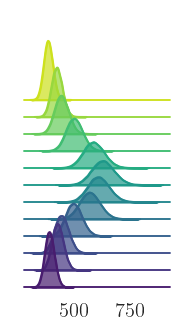

/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
<ipython-input-79-e5020c6f38b0>:109: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  _ = plt.tight_layout()


In [81]:
label_str = r"$H - \sum\log|\mathcal{J}|$"

daystr = io
timestr = io.get_timestamp('%H%M')
#outdir = os.path.abspath('/Users/saforem2/l2hmc-qcd/plots/ridgeplots')
#outdir = os.path.abspath('/lus/grand/projects/DLHMC/l2hmc-qcd/plots/ridgeplots')

label_str = r"$H - \sum\log|\mathcal{J}|$"
outfile = os.path.join(outdir, f'Hwf_{timestr}_1.pdf')

plt.style.use('default')
#sns.set_context('paper')
sns.set_palette('bright')
sns.set_style('whitegrid')
plt.rc('text', usetex=True)

#plt.rcParams.update(rc_context)

sns.set_palette('bright')
sns.set_context('talk')#, font_scale=0.85)#)#, font_scale=1.25)
cmap = plt.get_cmap('viridis_r')
#color = '#0182CA'
color = '#1AC938'
sns.set_style('whitegrid')

#$'axes.labelsize': 12.,
with mpl.rc_context({
    #'font.family': 'lmodern',
    #'font.size': 12.,  # 9.6000000000000000001
    #'figure.figsize': (4, 3),
    #'axes.labelsize': 12.,
    #'legend.fontsize': 8.,
    #'legend.labelspacing': 0.2, # 0.5
    #'legend.handletextpad': 0.3,  # 0.8
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        #r'\usepackage{lmodern}'
        r'\usepackage{amsmath}'
        r'\usepackage{amssymb}'
        r'\usepackage{microtype}'
        r'\usepackage{bm}'
        r'\usepackage{bbm}'
    )
}):
    Hwf_data_, (fig, ax) = make_ridgeplots1(hwf_dataset, label_str=label_str, cmap='viridis_r',
                                            num_chains=16, num_pts=5000, therm_frac=0.5,
                                            aspect=7, height=0.3, hspace=-0.725, out_dir=outdir,#, labelsize='small',
                                            #aspect=10, height=1.0, out_dir=outdir,
                                            usetex=True, ylabels=False)


In [37]:
%store 

UsageError: option --help not recognized ( allowed: "drz" )


In [38]:
%store hwf_dataset

Stored 'hwf_dataset' (Dataset)


/usr/local/cuda/bin:/opt/bin/:/lus/theta-fs0/software/thetagpu/openmpi-4.0.5/bin:/lus/grand/projects/DLHMC/tf_master-2021-03-02/bin:/lus/theta-fs0/software/thetagpu/conda/tf_master/2021-03-02/mconda3/condabin:/lus/theta-fs0/projects/DLHMC/thetaGPU/deephyper/build/pgsql/bin:/lus/theta-fs0/software/thetagpu/openmpi-4.0.5/ucx-1.9.0rc7/include:/lus/theta-fs0/software/thetagpu/openmpi-4.0.5/ucx-1.9.0rc7/bin:/lus/theta-fs0/software/thetagpu/openmpi-4.0.5/include:/lus/theta-fs0/software/thetagpu/openmpi-4.0.5/bin:/usr/local/cuda/bin:/opt/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/gpfs/mira-home/foremans/.linuxbrew/bin:/gpfs/mira-home/foremans/.linuxbrew/sbin:/home/foremans/.cargo/bin:/home/foremans/.local/bin:/home/foremans/bin:/.local/bin:/home/foremans/bin:/gpfs/mira-home/foremans/.fzf/bin:/home/foremans/.local/bin


<IPython.core.display.Javascript object>


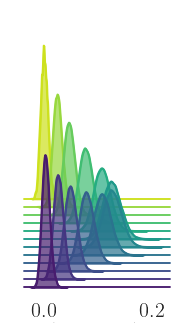

/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/lus/grand/projects/DLHMC/tf_master-2021-03-02/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
<ipython-input-79-e5020c6f38b0>:109: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  _ = plt.tight_layout()


In [87]:
#label_str = r"$\langle\varphi_{P} - \varphi_{P}^{*}\rangle$"
label_str = r"$\langle x_{P} - x_{P}^{*}\rangle$"
outfile = os.path.join(outdir, f'plaqsf_{timestr}.pdf')
sys.path.append('/gpfs/mira-home/foremans/.linuxbrew/bin')

#with mpl.rc_context({
#    'font.family': 'lmodern',
#    #'font.size': 12.,  # 9.6000000000000000001
#    '#axes.labelsize': 12.,
#    #'figure.figsize': (4, 3),
#    #'legend.fontsize': 8.,
#    'legend.labelspacing': 0.2, # 0.5
#    'legend.handletextpad': 0.3,  # 0.8
#    'text.usetex': True,
#    'text.latex.preamble': (            # LaTeX preamble
#        r'\usepackage{lmodern}'
#        r'\usepackage{amsmath}'
#        r'\usepackage{amssymb}'
#        r'\usepackage{microtype}'
#        r'\usepackage{bm}'
#        r'\usepackage{bbm}'
#    )
#}):
#    plt.style.use('default')
#    sns.set_context('paper')
#    sns.set_palette('bright')
#    sns.set_style('whitegrid')
plt.rc('text', usetex=True)
#sns.set_context('paper', font_scale=)

plaqsf_data_, (fig, ax) = make_ridgeplots1(plaqsf_dataset, label_str=label_str, cmap='viridis_r',
                                           num_chains=16, num_pts=5000, therm_frac=0.5,
                                           #aspect=15, height=0.5, out_dir=outdir, usetex=True, ylabels=True)
                                           aspect=7, height=0.3, hspace=-0.95, out_dir=outdir,#, labelsize='small',
                                           usetex=True, ylabels=False)
    

In [44]:
%matplotlib notebook

In [25]:
plt.show()

In [48]:
from config import PROJECT_DIR

def save_dataset_to_netcdf(dataset, outfile):
    console.log(f'Saving dataset to: {outfile}.')
    dataset.to_netcdf(outfile)

In [49]:
datasets_dir = os.path.join(PROJECT_DIR, 'datasets')
daystr = io.get_timestamp('%Y-%m-%d')
tstr = io.get_timestamp('%H%M')

outdir = os.path.join(datasets_dir, daystr)
io.check_else_make_dir(outdir)

hwf_outfile = os.path.join(outdir, 'hwf_dataset.nc')
save_dataset_to_netcdf(hwf_dataset, hwf_outfile)

#outfile = os.path.join(outdir, 'sinQf_dataset.nc')
#console.log(f'Saving sinQf_dataset to: {outfile}')
#sinQf_dataset.to_netcdf(outfile)

In [1]:
import utils.file_io as io
from config import PLOTS_DIR

daystr = io.get_timestamp('%Y-%m-%d')
timestr = io.get_timestamp('%H%M')

ridgeplots_dir = os.path.join(PLOTS_DIR, 'ridgeplots')
outdir = os.path.join(ridgeplots_dir, daystr)

#label_str = r"$\langle \varphi_{P} - \varphi_{P}^{*}\rangle$"
label_str = r"$\mathcal{Q}_{\mathbb{R}}$"
outfile = os.path.join(outdir, f'plaqsf_{timestr}.pdf')
sinQf_data_, (fig, ax) = make_ridgeplots1(sinQf_dataset, label_str=label_str,
                                          num_chains=256, num_pts=500, therm_frac=0.5,
                                          aspect=10, height=0.3, out_dir=outdir, ylabels=True)

ModuleNotFoundError: No module named 'utils'

In [36]:
np.unique(lfdf.lf)

array(['0', '1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [ ]:
fig, 

In [52]:
lfdf.loc[lfdf.lf] == 4

console.log(lfdf.T)

lfdf[lfdf.lf['4']]

console.log(lfdf.loc[:100, 0])

console.log(lfdf['9'])

fig = plt.figure(figsize=(16, 9))
axobjs = []
for lf in [int(i) np.unique(lfdf.lf)]:
    

KeyError: "None of [Index(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0',\n       ...\n       '11', '11', '11', '11', '11', '11', '11', '11', '11', '11'],\n      dtype='object', length=960000)] are in the [index]"

In [ ]:
countries = [x for x in np.unique(data.country)]
colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000']

gs = grid_spec.GridSpec(len(countries),1)
fig = plt.figure(figsize=(16,9))

i = 0

ax_objs = []
for country in countries:
    country = countries[i]
    x = np.array(data[data.country == country].score)
    x_d = np.linspace(0,1, 1000)

    kde = KernelDensity(bandwidth=0.03, kernel='gaussian')
    kde.fit(x[:, None])

    logprob = kde.score_samples(x_d[:, None])

    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    ax_objs[-1].plot(x_d, np.exp(logprob),color="#f0f0f0",lw=1)
    ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=1,color=colors[i])


    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0,1)
    ax_objs[-1].set_ylim(0,2.5)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])

    if i == len(countries)-1:
        ax_objs[-1].set_xlabel("Test Score", fontsize=16,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    adj_country = country.replace(" ","\n")
    ax_objs[-1].text(-0.02,0,adj_country,fontweight="bold",fontsize=14,ha="right")


    i += 1

gs.update(hspace=-0.7)

fig.text(0.07,0.85,"Distribution of Aptitude Test Results from 18 – 24 year-olds",fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
make_ridgeplots1

In [26]:
Hwf_data_.keys()

dict_keys(['hwf'])

In [35]:
#console.log(Hwf_data_['hwf']['lfdf'])

lfdf = Hwf_data_['hwf']['lfdf']
pal = sns.color_palette('viridis_r', n_colors=len(Hwf_data_['hwf']['val'].leapfrog.values))
g = sns.FacetGrid(lfdf, row='lf', hue='lf', palette=pal)#, aspect=10, height=0.3, palette=pal)
#g = sns.FacetGrid(, row='lf', hue='lf',  aspect=aspect, height=height, palette=pal)
_ = g.map(sns.kdeplot, 'hwf', shade=True, alpha=0.7, linewidth=1.5)
_ = g.map(plt.axhline, y=0, lw=1.5, alpha=0.7, clip_on=False, ls='-')
#_ = g.fig.subplots_adjust(hspace=-0.725)
_ = g.set_titles('')
_ = g.set(yticks=[])
_ = g.despine(bottom=True, left=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
data = {}
for key, val in dataset.data_vars.items():
    if 'leapfrog' in val.coords.dims:
        lf_data = {
            key: [],
            'lf': [],
        }
        for lf in val.leapfrog.values:
            x = val[{'leapfrog': lf}].values
            if num_chains is not none:
                console.log(f'x.shape: {x.shape}')
                x = therm_arr(x, therm_frac=therm_frac, ret_steps=false)
                x = x[:num_chains, :num_pts]
                #console.log(f'x.shape: {x.shape}')

            x = x.flatten()
            lf_arr = np.array(len(x) * [f'{lf}'])
            lf_data[key].extend(x)
            lf_data['lf'].extend(lf_arr)

        lfdf = pd.dataframe(lf_data)
        data[key] = {
            'lfdf': lfdf,
            'val': val,
        }

        pal = sns.color_palette(cmap, n_colors=len(val.leapfrog.values))
        #g = sns.facetgrid(lfdf, row='lf', hue='lf', aspect=1, height=3, palette=pal)
        g = sns.facetgrid(lfdf, row='lf', hue='lf',  aspect=aspect, height=height, palette=pal)
        _ = g.map(sns.kdeplot, key, cut=1, shade=true, alpha=0.7, linewidth=1.5)
        _ = g.map(plt.axhline, y=0, lw=1.5, alpha=0.7, clip_on=false, ls='-')
        def get_label(x, color, label):
            ax = plt.gca()
            ax.text(0, 0.01, label, color=color, ha='left', va='bottom', #fontweight='bold'
                    transform=ax.transaxes)#, fontsize='small')

        if ylabels:
            _ = g.map(get_label, key)

        if xticks is not none:
            plt.xticks(xticks)
            #plt.xlim(xlim)

        _ = g.fig.subplots_adjust(hspace=-0.725)
        _ = g.set_titles('')
        _ = g.set(yticks=[])
        _ = g.despine(bottom=true, left=true)
        fig = plt.gcf()
        ax = plt.gca()
        _ = ax.set_xlabel(label_str)
        _ = plt.tight_layout()

In [ ]:
import xarray as xr

from utils.data_containers import DataContainer

container = DataContainer(0)
for 
data = container.load_data(data_dir)
    for key, val in data.items():
        container.data[key] = np.array(val).tolist()
        
    dataset = container.get_dataset(therm_frac=therm_frac)
    return dataset

In [5]:
import arviz as az
import xarray as xr


dfile = os.path.join(ridgeplots_dir, 'plaqsf_dataset')
plaqsf_dataset = xr.open_dataset(dfile)

In [6]:
plaqsf_dataset.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:   (chain: 512, draw: 100000, leapfrog: 16)
Coordinates:
  * chain     (chain) int64 0 1 2 3 4 5 6 7 ... 504 505 506 507 508 509 510 511
  * leapfrog  (leapfrog) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * draw      (draw) int64 25000 25001 25002 25003 ... 124997 124998 124999
Data variables:
    plaqsf    (chain, leapfrog, draw) float64 -0.011 -0.011 ... 9.698e-05>

# New heading

/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


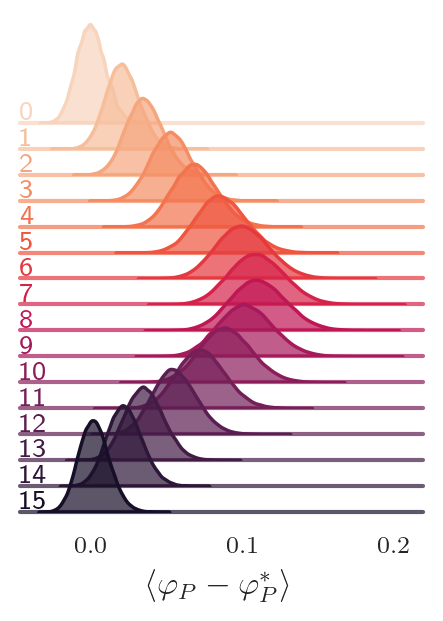

In [78]:
import utils.file_io as io
from config import PLOTS_DIR

daystr = io.get_timestamp('%Y-%m-%d')
timestr = io.get_timestamp('%H%M')

ridgeplots_dir = os.path.join(PLOTS_DIR, 'ridgeplots')
outdir = os.path.join(ridgeplots_dir, daystr)

label_str = r"$\langle \varphi_{P} - \varphi_{P}^{*}\rangle$"
outfile = os.path.join(outdir, f'plaqsf_{timestr}.pdf')
#data, (fig, ax) = make_ridgeplots1(plaqsf_dataset, label_str=label_str,
#                                   num_chains=256, num_pts=500, therm_frac=0.5,
#                                   aspect=13, height=0.2, out_dir=outdir)

with mpl.rc_context({
    'font.family': 'lmodern',
    'font.size': 12.,  # 9.6000000000000000001
    'axes.labelsize': 12.,
    'figure.figsize': (4, 3),
    'legend.fontsize': 8.,
    'legend.labelspacing': 0.2, # 0.5
    'legend.handletextpad': 0.3,  # 0.8
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        r'\usepackage{amsmath}'
        r'\usepackage{amssymb}'
        r'\usepackage{microtype}'
        r'\usepackage{bm}'
        r'\usepackage{bbm}'
    )
}):
    plt.style.use('default')
    sns.set_context('paper')
    sns.set_palette('bright')
    sns.set_style('whitegrid')
    plt.rc('text', usetex=True)
    data, (fig, ax) = make_ridgeplots1(plaqsf_dataset, label_str=label_str,
                                       num_chains=256, num_pts=500, therm_frac=0.5,
                                       aspect=13, height=0.2, out_dir=outdir)
    
    #print(f'Saving figure to: {outfile}')
    #_ = plt.savefig(outfile, bbox_inches='tight')

In [45]:
console.log(data)

/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
<ipython-input-55-d1c104efc5aa>:37: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  _ = plt.tight_layout()


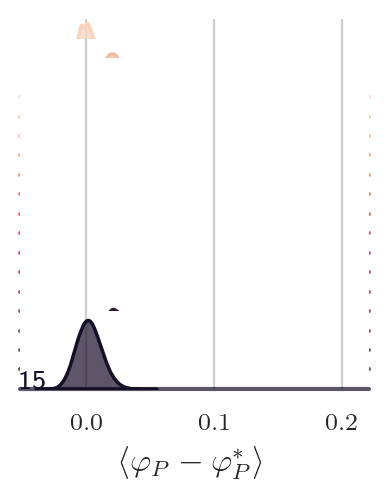

In [55]:
with mpl.rc_context({
    'font.family': 'lmodern',
    'font.size': 12.,  # 9.6000000000000000001
    'figure.figsize': (4, 3),
    'axes.labelsize': 12.,
    'legend.fontsize': 8.,
    'legend.labelspacing': 0.2, # 0.5
    'legend.handletextpad': 0.3,  # 0.8
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        #r'\usepackage{lmodern}'
        r'\usepackage{amsmath}'
        r'\usepackage{amssymb}'
        r'\usepackage{microtype}'
        r'\usepackage{bm}'
        r'\usepackage{bbm}'
    )
}):
    for key, entry in data.items():
        val = entry['val']
        lfdf = entry['lfdf']
        pal = sns.color_palette('rocket_r', n_colors=len(val.leapfrog.values))
        #g = sns.FacetGrid(lfdf, row='lf', hue='lf', aspect=1, height=3, palette=pal)
        g = sns.FacetGrid(lfdf, row='lf', hue='lf', palette=pal, aspect=15, height=0.15)
        _ = g.map(sns.kdeplot, key, cut=1, shade=True, alpha=0.7, linewidth=1.25)
        _ = g.map(plt.axhline, y=0, lw=1.5, alpha=0.7, clip_on=False)
        def get_label(x, color, label):
            ax = plt.gca()
            ax.text(0, 0.10, label, fontweight='bold', color=color, ha='left', va='center', transform=ax.transAxes, fontsize='small')

        _ = g.map(get_label, key)
        _ = g.fig.subplots_adjust(hspace=-0.75)
        _ = g.set_titles('')
        _ = g.set(yticks=[])
        _ = g.despine(bottom=True, left=True)
        fig = plt.gcf()
        _ = plt.tight_layout()
        ax = plt.gca()
        _ = ax.set_xlabel(label_str)
            
    print(f'Saving figure to: {outfile}')
    _ = plt.savefig(outfile, bbox_inches='tight')

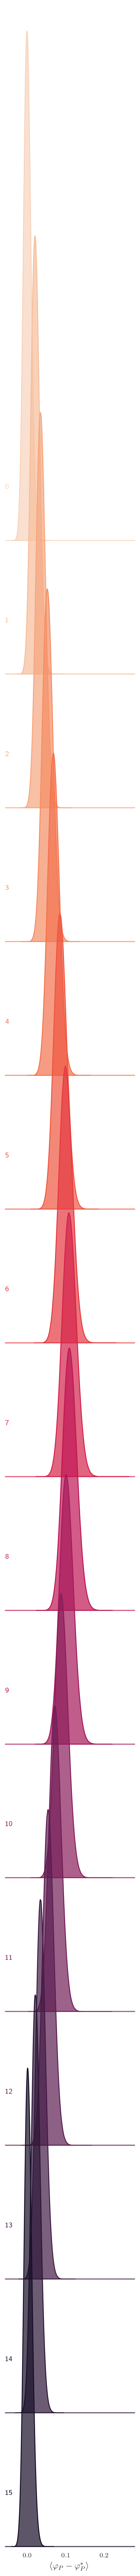

In [9]:
import utils.file_io as io
from config import PLOTS_DIR

daystr = io.get_timestamp('%Y-%m-%d')
timestr = io.get_timestamp('%H%M')

ridgeplots_dir = os.path.join(PLOTS_DIR, 'ridgeplots')
outdir = os.path.join(ridgeplots_dir, daystr)

label_str = r"$\langle \varphi_{P} - \varphi_{P}^{*}\rangle$"
fig, ax = make_ridgeplots1(plaqsf_dataset, num_chains=128, out_dir=outdir, label_str=label_str)
